# **`DiTenun - Ulos Image Classification`**

# **`Business Understanding`**

### **`Based on Data`***

Ulos adalah kain tradisional suku Batak yang memiliki berbagai motif sesuai dengan makna budayanya. Motif yang beragam dengan variasi dan pola yang rumit sering kali menyebabkan penggolongan ulos yang cukup rumit. Tugas analitik utama adalah klasifikasi motif ulos. Dengan menggunakan algoritma Convolutional Neural Network (CNN), proyek ini bertujuan untuk memprediksi kelas atau kategori ulos berdasarkan gambar motifnya.

Data yang diperlukan adalah gambar ulos yang memiliki deskripsi tentang jenis ulosnya (misalnya: Ulos Ragidup, Ulos Sibolang, Ulos Sadum, dan lain-lain). Dataset dapat diakses dari Kaggle. Dataset berisi 1.231 gambar motif ulos dengan 6 label yang menunjukkan jenis motif ulos (Pinuncaan, Ragi Hidup, Ragi Hotang, Sadum, Sibolang, Tumtuman). Dataset ini merupakan dataset via public data. Data sudah dibagi untuk train dan test data.

### **`Rencana Pelaksanaan Proyek`***


Ruang lingkup (Berdasarkan Work Breakdown Structure) dari proyek ini adalah sebagai berikut:

1. Persiapan
Pemilihan kasus, yaitu identifikasi masalah klasifikasi motif ulos.
Penentuan Algoritma, yaitu memilih algoritma CNN sebagai metode untuk klasifikasi gambar.

2. Pelaksanaan

- Business Understanding, yaitu mementukan objektif proyek, tujuan proyek, dan rencana proyek.
- Data Understanding, yaitu mengumpulkan data, menelaah data, dan memvalidasi data.
- Data Preparation, yaitu memilah , membersikan, mengkonstruksi, menentukan label, dan mengintegrasikan data.
- Modeling, yaitu membangun skenario pengujian, dan membangun model.
- Model Evaluation, yaitu mengevaluasi hasil pemodelan, dan melakukan review proses pemodelan.
- Deployment, yaitu melakukan deployment model dan membuat laporan akhir proyek.

Timeline yang dibutuhkan untuk melakukan proyek ini adalah sekitar 5 minggu untuk proses pengumpulan dan pelabelan data sampai dengan implementasi (deployment).

# **`Data Understanding`**

### **`Mengumpulkan Data`**

In [4]:
#Mount Google Drive

from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Path ke folder train dan test
train_path = '/content/drive/MyDrive/Dataset Ulos/Train'  # Ganti dengan path folder train
test_path = '/content/drive/MyDrive/Dataset Ulos/Test'  # Ganti dengan path folder test

Mounted at /content/drive


**`Jumlah Data`**

In [5]:
import os
import pandas as pd
from tabulate import tabulate

def count_images(folder_path):
    # Inisialisasi dictionary untuk menyimpan jumlah gambar per kategori
    category_counts = {}

    # Loop melalui setiap folder di dalam folder_path
    for category_folder in os.listdir(folder_path):
        category_path = os.path.join(folder_path, category_folder)
        if os.path.isdir(category_path):  # Pastikan hanya membaca folder
            num_images = len([
                f for f in os.listdir(category_path)
                if not f.startswith('.') and f.lower().endswith(('.png', '.jpg', '.jpeg'))
            ])
            category_counts[category_folder] = num_images

    # Konversi hasil ke DataFrame
    category_df = pd.DataFrame(list(category_counts.items()), columns=['Category', 'Image Count'])
    total_images = category_df['Image Count'].sum()
    return category_df, total_images

# Hitung data train
train_category_df, total_train_images = count_images(train_path)
print("Jumlah kategori dan gambar pada folder train:")
print(tabulate(train_category_df, headers='keys', tablefmt='pretty', showindex=False))
print(f"\nJumlah total gambar pada folder train: {total_train_images}")

# Hitung data test
test_category_df, total_test_images = count_images(test_path)
print("\nJumlah kategori dan gambar pada folder test:")
print(tabulate(test_category_df, headers='keys', tablefmt='pretty', showindex=False))
print(f"\nJumlah total gambar pada folder test: {total_test_images}")

Jumlah kategori dan gambar pada folder train:
+-------------+-------------+
|  Category   | Image Count |
+-------------+-------------+
|    Sadum    |     136     |
|  Pinuncaan  |     134     |
| Ragi Hotang |     138     |
| Ragi Hidup  |     136     |
|  Tumtuman   |     136     |
|  Sibolang   |     135     |
+-------------+-------------+

Jumlah total gambar pada folder train: 815

Jumlah kategori dan gambar pada folder test:
+-------------+-------------+
|  Category   | Image Count |
+-------------+-------------+
|    Sadum    |     68      |
|  Pinuncaan  |     67      |
| Ragi Hotang |     71      |
|  Tumtuman   |     70      |
| Ragi Hidup  |     69      |
|  Sibolang   |     71      |
+-------------+-------------+

Jumlah total gambar pada folder test: 416


**`Deskripsi Data`**

In [10]:
from google.colab import drive
import os
import pandas as pd
from tabulate import tabulate

# Path folder dataset
dataset_path = '/content/drive/MyDrive/Dataset Ulos'

# Fungsi untuk mendapatkan deskripsi data
def describe_dataset(dataset_path):
    file_details = []

    # Menelusuri seluruh file dan folder
    for root, dirs, files in os.walk(dataset_path):
        for file in files:
            if not file.startswith('.') and file.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp')):
                # Menentukan kategori berdasarkan nama folder
                category = os.path.basename(root)
                file_format = file.split('.')[-1]  # Mendapatkan ekstensi file
                file_details.append({'Category': category, 'File Name': file, 'File Format': file_format})

    # Mengubah hasil ke dalam bentuk DataFrame
    file_df = pd.DataFrame(file_details)
    return file_df

# Mendapatkan deskripsi dataset
file_df = describe_dataset(dataset_path)

# Menampilkan 5 data pertama
print("\nDeskripsi data (5 data pertama):")
print(tabulate(file_df.head(5), headers='keys', tablefmt='pretty', showindex=False))

# Menampilkan jumlah total file dalam dataset
print(f"\nJumlah total file dalam dataset: {len(file_df)}")



Deskripsi data (5 data pertama):
+----------+----------------------------+-------------+
| Category |         File Name          | File Format |
+----------+----------------------------+-------------+
|  Sadum   |  IMG_20240611_193239.jpg   |     jpg     |
|  Sadum   |  IMG_20240611_193245.jpg   |     jpg     |
|  Sadum   |  IMG_20240611_193242.jpg   |     jpg     |
|  Sadum   |  IMG_20240611_193241.jpg   |     jpg     |
|  Sadum   | IMG_20240705_231530_42.jpg |     jpg     |
+----------+----------------------------+-------------+

Jumlah total file dalam dataset: 1231


### **`Menelaah Data`**

**`Karakteristik data`**

In [11]:
import os
import pandas as pd
from tabulate import tabulate

# Path dataset
dataset_path = '/content/drive/MyDrive/Dataset Ulos'

# Fungsi untuk mendapatkan deskripsi data lengkap dengan karakteristik
def describe_dataset(dataset_path):
    file_details = []

    # Menelusuri seluruh file dan folder
    for root, dirs, files in os.walk(dataset_path):
        for file in files:
            if not file.startswith('.') and file.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp')):
                # Menentukan kategori berdasarkan nama folder
                category = os.path.basename(root)
                file_format = file.split('.')[-1]  # Mendapatkan ekstensi file
                file_path = os.path.join(root, file)  # Mendapatkan path file lengkap

                # Mendapatkan karakteristik file: ukuran dan tanggal terakhir dimodifikasi
                file_size = os.path.getsize(file_path)  # Ukuran file dalam byte
                last_modified = os.path.getmtime(file_path)  # Timestamp terakhir dimodifikasi

                # Menyimpan informasi dalam bentuk dictionary
                file_details.append({
                    'Category': category,
                    'File Name': file,
                    'File Format': file_format,
                    'File Size (bytes)': file_size,
                    'Last Modified': last_modified
                })

    # Mengubah hasil ke dalam bentuk DataFrame
    file_df = pd.DataFrame(file_details)
    return file_df

# Mendapatkan deskripsi dataset
file_df = describe_dataset(dataset_path)

# Menampilkan semua deskripsi dataset menggunakan tabulate
print(tabulate(file_df.head(5), headers='keys', tablefmt='pretty', showindex=False))  # Menampilkan semua baris

# Menampilkan jumlah total file yang dianalisis
print(f"\nJumlah total file dalam dataset: {len(file_df)}")

+----------+----------------------------+-------------+-------------------+---------------+
| Category |         File Name          | File Format | File Size (bytes) | Last Modified |
+----------+----------------------------+-------------+-------------------+---------------+
|  Sadum   |  IMG_20240611_193239.jpg   |     jpg     |      6034986      | 1735573776.0  |
|  Sadum   |  IMG_20240611_193245.jpg   |     jpg     |      5405408      | 1735573776.0  |
|  Sadum   |  IMG_20240611_193242.jpg   |     jpg     |      5275014      | 1735573776.0  |
|  Sadum   |  IMG_20240611_193241.jpg   |     jpg     |      5275509      | 1735573776.0  |
|  Sadum   | IMG_20240705_231530_42.jpg |     jpg     |      1955647      | 1735573777.0  |
+----------+----------------------------+-------------+-------------------+---------------+

Jumlah total file dalam dataset: 1231


**`Keterkaitan data`**


ANOVA Test Results:
F-statistic: 173.15445738956268, p-value: 1.9097527024194823e-139
Ada perbedaan signifikan dalam ukuran file antar kategori.

Kendall's Tau Test Results:
Tau: 0.19850872931039945, p-value: 4.47477465758758e-22
Ada asosiasi signifikan antara ukuran file dan kategori.

Chi-Squared Test Results:
Chi-Squared: 1575.0099207161215, p-value: 0.0
Ada asosiasi signifikan antara kategori dan format file.

Mutual Information between 'Category' and 'File Size (bytes)': 2.9670883590528963


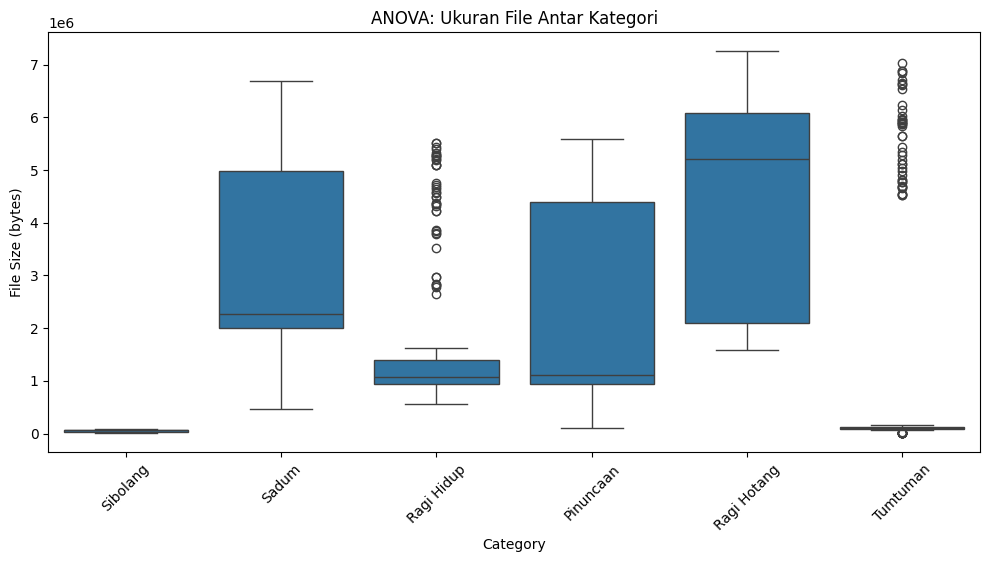

<Figure size 640x480 with 0 Axes>

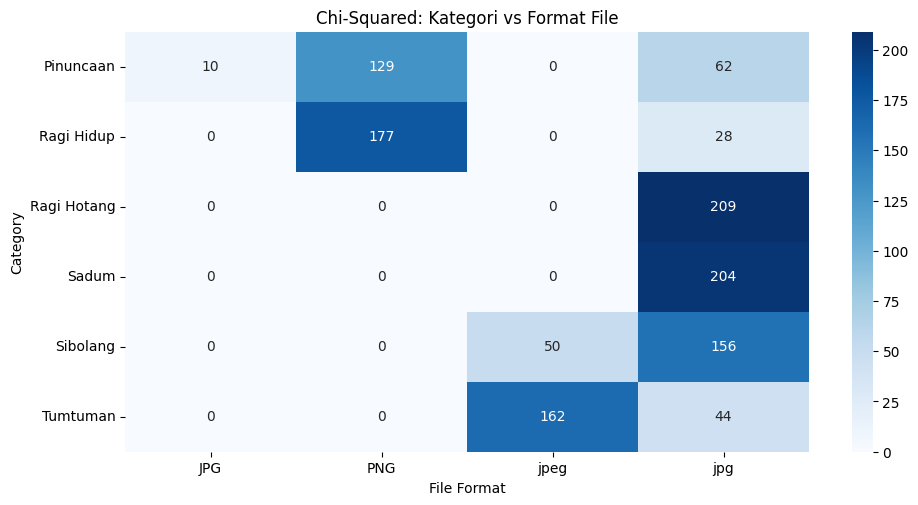

<Figure size 640x480 with 0 Axes>

In [14]:
import os
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, kendalltau, f_oneway
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

# Path dataset
dataset_path = '/root/.cache/kagglehub/datasets/fthnaja/kain-ulos/versions/3'

# Fungsi untuk mendapatkan deskripsi data lengkap dengan karakteristik
def describe_dataset(dataset_path):
    file_details = []

    # Menelusuri seluruh file dan folder
    for root, dirs, files in os.walk(dataset_path):
        for file in files:
            if not file.startswith('.') and file.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp')):
                # Menentukan kategori berdasarkan nama folder
                category = os.path.basename(root)
                file_format = file.split('.')[-1]  # Mendapatkan ekstensi file
                file_path = os.path.join(root, file)  # Mendapatkan path file lengkap

                # Mendapatkan karakteristik file: ukuran dan tanggal terakhir dimodifikasi
                file_size = os.path.getsize(file_path)  # Ukuran file dalam byte
                last_modified = os.path.getmtime(file_path)  # Timestamp terakhir dimodifikasi

                # Menyimpan informasi dalam bentuk dictionary
                file_details.append({
                    'Category': category,
                    'File Name': file,
                    'File Format': file_format,
                    'File Size (bytes)': file_size,
                    'Last Modified': last_modified
                })

    # Mengubah hasil ke dalam bentuk DataFrame
    file_df = pd.DataFrame(file_details)
    return file_df

# Mendapatkan deskripsi dataset
file_df = describe_dataset(dataset_path)

# Uji ANOVA: Uji perbedaan ukuran file antar kategori
categories = file_df['Category'].unique()
file_sizes_by_category = [file_df[file_df['Category'] == category]['File Size (bytes)'] for category in categories]

# Melakukan uji ANOVA
f_stat, p_value = f_oneway(*file_sizes_by_category)

# Menampilkan hasil uji ANOVA
print(f"\nANOVA Test Results:")
print(f"F-statistic: {f_stat}, p-value: {p_value}")

if p_value < 0.05:
    print("Ada perbedaan signifikan dalam ukuran file antar kategori.")
else:
    print("Tidak ada perbedaan signifikan dalam ukuran file antar kategori.")

# Kendall's Tau: Mengukur asosiasi antara dua variabel ordinal (misalnya ukuran file dan kategori numerik)
# Mengonversi kategori menjadi angka untuk analisis
category_mapping = {category: idx for idx, category in enumerate(file_df['Category'].unique())}
file_df['Category Numeric'] = file_df['Category'].map(category_mapping)

kendall_corr, kendall_p_value = kendalltau(file_df['File Size (bytes)'], file_df['Category Numeric'])

# Menampilkan hasil Kendall's Tau
print(f"\nKendall's Tau Test Results:")
print(f"Tau: {kendall_corr}, p-value: {kendall_p_value}")

if kendall_p_value < 0.05:
    print("Ada asosiasi signifikan antara ukuran file dan kategori.")
else:
    print("Tidak ada asosiasi signifikan antara ukuran file dan kategori.")

# Uji Chi-Squared: Uji independensi antara kategori dan format file
contingency_table = pd.crosstab(file_df['Category'], file_df['File Format'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-Squared Test Results:")
print(f"Chi-Squared: {chi2}, p-value: {p}")

if p < 0.05:
    print("Ada asosiasi signifikan antara kategori dan format file.")
else:
    print("Tidak ada asosiasi signifikan antara kategori dan format file.")

# Mutual Information: Mengukur seberapa banyak informasi yang dibagikan antara dua variabel
# Memerlukan konversi kategori menjadi numerik untuk ukuran file
from sklearn.preprocessing import LabelEncoder

# Encode kategori dan format file
label_encoder = LabelEncoder()
file_df['Category Encoded'] = label_encoder.fit_transform(file_df['Category'])
file_df['File Format Encoded'] = label_encoder.fit_transform(file_df['File Format'])

# Menghitung Mutual Information antara kategori dan ukuran file
X = file_df[['Category Encoded', 'File Format Encoded']]
y = file_df['File Size (bytes)']

mutual_info = mutual_info_classif(X, y)
print(f"\nMutual Information between 'Category' and 'File Size (bytes)': {mutual_info[0]}")

# Visualisasi untuk ANOVA dan Chi-Squared

# ANOVA Visualisasi: Distribusi ukuran file antar kategori
plt.figure(figsize=(10, 6))  # Membuat figure baru dan mengatur ukuran
sns.boxplot(x='Category', y='File Size (bytes)', data=file_df)
plt.title('ANOVA: Ukuran File Antar Kategori')
plt.xticks(rotation=45)
plt.tight_layout()  # Menyesuaikan tata letak
plt.subplots_adjust(top=0.9, bottom=0.2)  # Memberikan jarak ekstra
plt.show()
plt.clf()  # Membersihkan canvas untuk visualisasi berikutnya

# Chi-Squared Visualisasi: Tabel kontingensi antara kategori dan format file
plt.figure(figsize=(10, 6))  # Membuat figure baru dan mengatur ukuran
sns.heatmap(contingency_table, annot=True, cmap="Blues", fmt="d")
plt.title('Chi-Squared: Kategori vs Format File')
plt.tight_layout()  # Menyesuaikan tata letak
plt.subplots_adjust(top=0.9, bottom=0.2)  # Memberikan jarak ekstra
plt.show()
plt.clf()  # Membersihkan canvas untuk visualisasi berikutnya


### **`Memvalidasi data`**

**`Ukuran Data`**

In [15]:
import os
import pandas as pd

# Path dataset
dataset_path = '/content/drive/MyDrive/Dataset Ulos'

# Fungsi untuk mendapatkan deskripsi dataset dan validasi ukuran file
def validate_file_sizes(dataset_path, min_size=0, max_size=float('inf')):
    file_details = []

    # Menelusuri seluruh file dan folder
    for root, dirs, files in os.walk(dataset_path):
        for file in files:
            if not file.startswith('.') and file.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp')):
                # Menentukan kategori berdasarkan nama folder
                category = os.path.basename(root)
                file_format = file.split('.')[-1]  # Mendapatkan ekstensi file
                file_path = os.path.join(root, file)  # Mendapatkan path file lengkap

                # Mendapatkan karakteristik file: ukuran dan tanggal terakhir dimodifikasi
                file_size = os.path.getsize(file_path)  # Ukuran file dalam byte
                last_modified = os.path.getmtime(file_path)  # Timestamp terakhir dimodifikasi

                # Memvalidasi ukuran file apakah sesuai dengan batasan yang diberikan
                size_status = "Valid"
                if file_size < min_size:
                    size_status = f"Too small ({file_size} bytes)"
                elif file_size > max_size:
                    size_status = f"Too large ({file_size} bytes)"

                # Menyimpan informasi dalam bentuk dictionary
                file_details.append({
                    'Category': category,
                    'File Name': file,
                    'File Format': file_format,
                    'File Size (bytes)': file_size,
                    'Size Status': size_status,
                    'Last Modified': last_modified
                })

    # Mengubah hasil ke dalam bentuk DataFrame
    file_df = pd.DataFrame(file_details)
    return file_df

# Menentukan batasan ukuran file (misalnya: min_size = 1000 bytes, max_size = 5 MB)
min_size = 1000  # minimal 1 KB
max_size = 5 * 1024 * 1024  # maksimal 5 MB

# Mendapatkan deskripsi dataset dan validasi ukuran file
file_df = validate_file_sizes(dataset_path, min_size, max_size)

# Menampilkan atribut (kolom) dan jumlah record
print("Atribut (Kolom) Dataset:")
print(file_df.columns.tolist())

# Menampilkan jumlah record dan kolom dalam format yang diinginkan
print(f"\nJumlah Record dan Kolom Dataset: {file_df.shape[0]} rows x {file_df.shape[1]} columns")

Atribut (Kolom) Dataset:
['Category', 'File Name', 'File Format', 'File Size (bytes)', 'Size Status', 'Last Modified']

Jumlah Record dan Kolom Dataset: 1231 rows x 6 columns


**`Deskripsi Statistical Atribut`**

In [16]:
import os
import pandas as pd

# Path dataset
dataset_path = '/content/drive/MyDrive/Dataset Ulos'

# Fungsi untuk mendapatkan deskripsi dataset dan validasi ukuran file
def get_file_statistics(dataset_path):
    file_details = []

    # Menelusuri seluruh file dan folder
    for root, dirs, files in os.walk(dataset_path):
        for file in files:
            if not file.startswith('.') and file.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp')):
                # Menentukan kategori berdasarkan nama folder
                category = os.path.basename(root)
                file_format = file.split('.')[-1]  # Mendapatkan ekstensi file
                file_path = os.path.join(root, file)  # Mendapatkan path file lengkap

                # Mendapatkan karakteristik file: ukuran dan tanggal terakhir dimodifikasi
                file_size = os.path.getsize(file_path)  # Ukuran file dalam byte
                last_modified = os.path.getmtime(file_path)  # Timestamp terakhir dimodifikasi

                # Menyimpan informasi dalam bentuk dictionary
                file_details.append({
                    'Category': category,
                    'File Name': file,
                    'File Format': file_format,
                    'File Size (bytes)': file_size,
                    'Last Modified': last_modified
                })

    # Mengubah hasil ke dalam bentuk DataFrame
    file_df = pd.DataFrame(file_details)
    return file_df

# Mendapatkan deskripsi dataset dan validasi ukuran file
file_df = get_file_statistics(dataset_path)

# Menampilkan deskripsi statistik dari atribut numerik
print("Deskripsi Statistik Atribut (Ukuran File dalam Byte):")
print(file_df['File Size (bytes)'].describe())

# Menampilkan statistik deskriptif kategori (kategori gambar)
print("\nFrekuensi Kategori:")
print(file_df['Category'].value_counts())

# Menampilkan statistik deskriptif terkait format file (ekstensi file)
print("\nFrekuensi Format File:")
print(file_df['File Format'].value_counts())

Deskripsi Statistik Atribut (Ukuran File dalam Byte):
count    1.231000e+03
mean     2.152272e+06
std      2.175859e+06
min      8.131000e+03
25%      1.017080e+05
50%      1.195456e+06
75%      4.300208e+06
max      7.253876e+06
Name: File Size (bytes), dtype: float64

Frekuensi Kategori:
Category
Ragi Hotang    209
Tumtuman       206
Sibolang       206
Ragi Hidup     205
Sadum          204
Pinuncaan      201
Name: count, dtype: int64

Frekuensi Format File:
File Format
jpg     703
PNG     306
jpeg    212
JPG      10
Name: count, dtype: int64


**`Relasi Antar Atribut`**


Korelasi antar atribut numerik (hanya ukuran file dan waktu modifikasi):


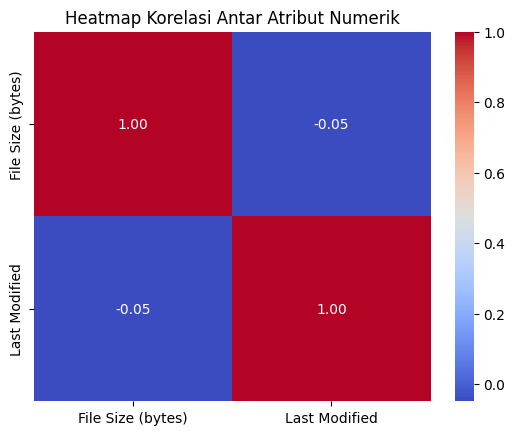


Cross-Tabulation antara Kategori dan Format File:
File Format  JPG  PNG  jpeg  jpg
Category                        
Pinuncaan     10  129     0   62
Ragi Hidup     0  177     0   28
Ragi Hotang    0    0     0  209
Sadum          0    0     0  204
Sibolang       0    0    50  156
Tumtuman       0    0   162   44


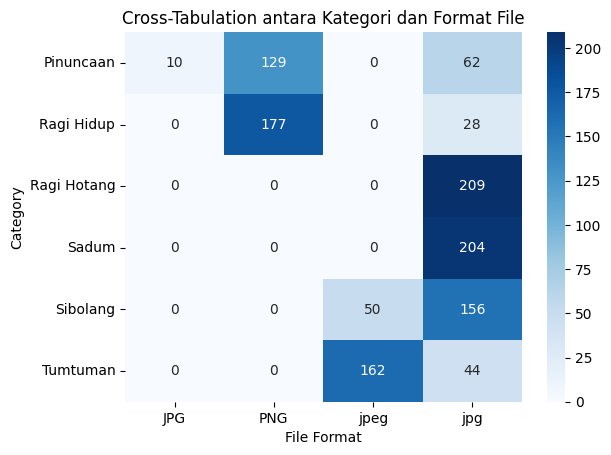

In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Path dataset
dataset_path = '/root/.cache/kagglehub/datasets/fthnaja/kain-ulos/versions/3'

# Fungsi untuk mendapatkan statistik file
def get_file_statistics(dataset_path):
    file_details = []

    # Menelusuri seluruh file dan folder
    for root, dirs, files in os.walk(dataset_path):
        for file in files:
            if not file.startswith('.') and file.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp')):
                # Menentukan kategori berdasarkan nama folder
                category = os.path.basename(root)
                file_format = file.split('.')[-1]  # Mendapatkan ekstensi file
                file_path = os.path.join(root, file)  # Mendapatkan path file lengkap

                # Mendapatkan karakteristik file: ukuran dan tanggal terakhir dimodifikasi
                file_size = os.path.getsize(file_path)  # Ukuran file dalam byte
                last_modified = os.path.getmtime(file_path)  # Timestamp terakhir dimodifikasi

                # Menyimpan informasi dalam bentuk dictionary
                file_details.append({
                    'Category': category,
                    'File Name': file,
                    'File Format': file_format,
                    'File Size (bytes)': file_size,
                    'Last Modified': last_modified
                })

    # Mengubah hasil ke dalam bentuk DataFrame
    file_df = pd.DataFrame(file_details)
    return file_df

# Mendapatkan deskripsi dataset dan validasi ukuran file
file_df = get_file_statistics(dataset_path)

# Menampilkan korelasi antar atribut numerik
print("\nKorelasi antar atribut numerik (hanya ukuran file dan waktu modifikasi):")
numeric_columns = ['File Size (bytes)', 'Last Modified']
correlation_matrix = file_df[numeric_columns].corr()

# Menampilkan heatmap korelasi
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Heatmap Korelasi Antar Atribut Numerik')
plt.show()

# Menampilkan relasi antara kategori dan format file menggunakan Cross Tabulation
print("\nCross-Tabulation antara Kategori dan Format File:")
category_format_ct = pd.crosstab(file_df['Category'], file_df['File Format'])
print(category_format_ct)

# Visualisasi Cross-Tabulation menggunakan Heatmap
sns.heatmap(category_format_ct, annot=True, cmap="Blues", fmt="d")
plt.title('Cross-Tabulation antara Kategori dan Format File')
plt.ylabel('Category')
plt.xlabel('File Format')
plt.show()

**`Visualisasi Data`**

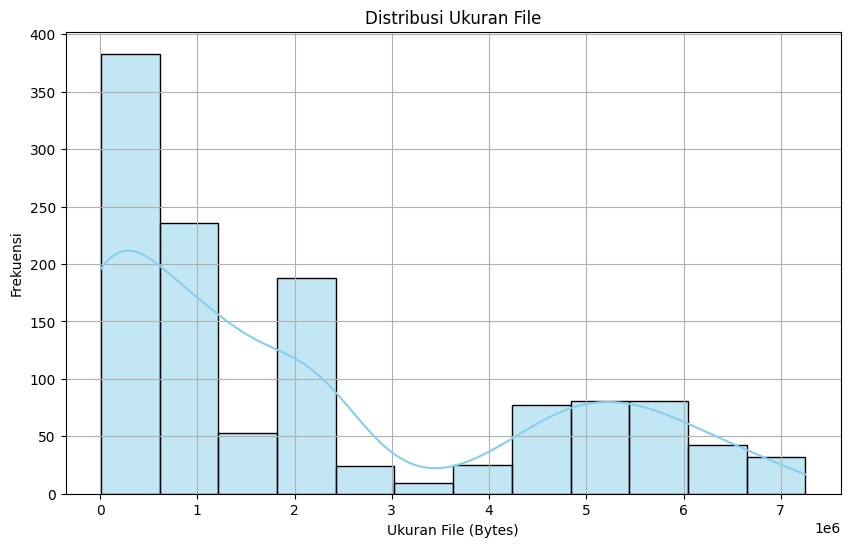

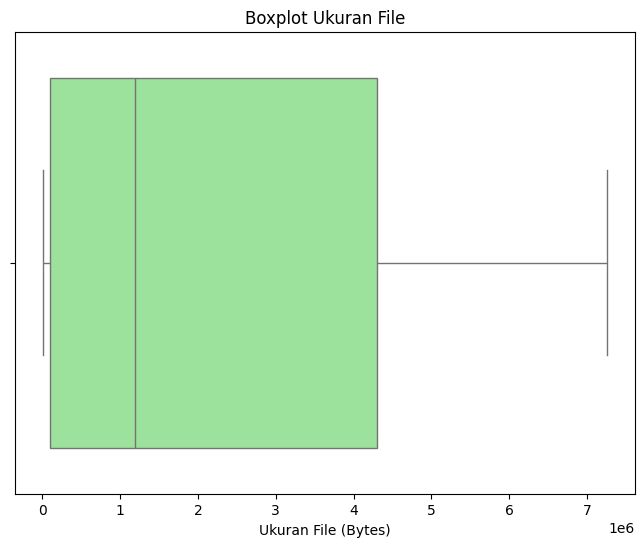

<ipython-input-12-fd6cf4df6e99>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='muted')


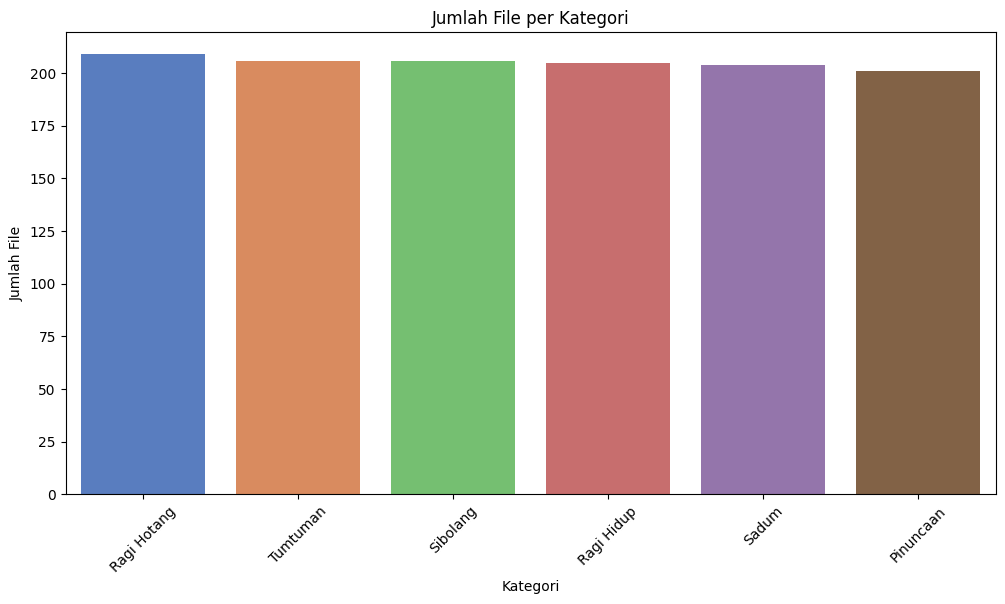

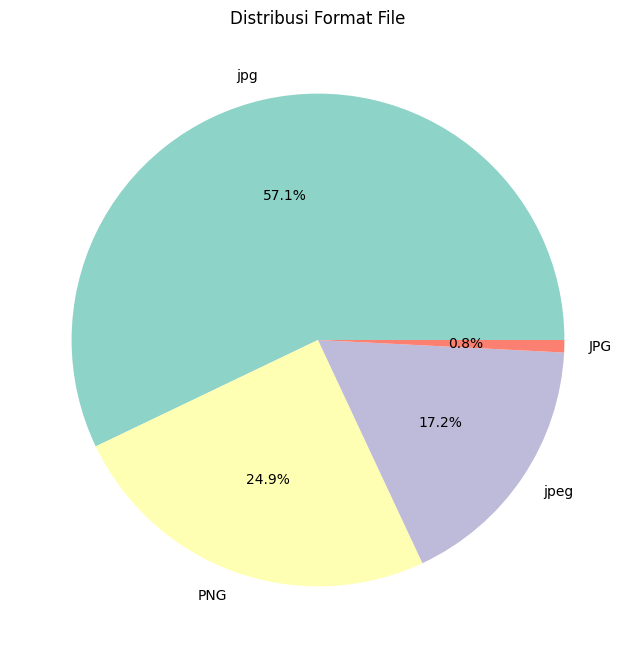

In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Path dataset
dataset_path = '/root/.cache/kagglehub/datasets/fthnaja/kain-ulos/versions/3'

# Fungsi untuk mendapatkan statistik file
def get_file_statistics(dataset_path):
    file_details = []

    # Menelusuri seluruh file dan folder
    for root, dirs, files in os.walk(dataset_path):
        for file in files:
            if not file.startswith('.') and file.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp')):
                # Menentukan kategori berdasarkan nama folder
                category = os.path.basename(root)
                file_format = file.split('.')[-1]  # Mendapatkan ekstensi file
                file_path = os.path.join(root, file)  # Mendapatkan path file lengkap

                # Mendapatkan karakteristik file: ukuran dan tanggal terakhir dimodifikasi
                file_size = os.path.getsize(file_path)  # Ukuran file dalam byte
                last_modified = os.path.getmtime(file_path)  # Timestamp terakhir dimodifikasi

                # Menyimpan informasi dalam bentuk dictionary
                file_details.append({
                    'Category': category,
                    'File Name': file,
                    'File Format': file_format,
                    'File Size (bytes)': file_size,
                    'Last Modified': last_modified
                })

    # Mengubah hasil ke dalam bentuk DataFrame
    file_df = pd.DataFrame(file_details)
    return file_df

# Mendapatkan deskripsi dataset dan validasi ukuran file
file_df = get_file_statistics(dataset_path)

# 1. Visualisasi distribusi ukuran file menggunakan Histogram
plt.figure(figsize=(10, 6))
sns.histplot(file_df['File Size (bytes)'], kde=True, color='skyblue')
plt.title('Distribusi Ukuran File')
plt.xlabel('Ukuran File (Bytes)')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

# 2. Boxplot untuk distribusi ukuran file
plt.figure(figsize=(8, 6))
sns.boxplot(x=file_df['File Size (bytes)'], color='lightgreen')
plt.title('Boxplot Ukuran File')
plt.xlabel('Ukuran File (Bytes)')
plt.show()

# 3. Visualisasi kategori file berdasarkan kategori menggunakan Barplot
plt.figure(figsize=(12, 6))
category_counts = file_df['Category'].value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values, palette='muted')
plt.title('Jumlah File per Kategori')
plt.xlabel('Kategori')
plt.ylabel('Jumlah File')
plt.xticks(rotation=45)
plt.show()

# 4. Pie chart untuk distribusi format file
plt.figure(figsize=(8, 8))
file_format_counts = file_df['File Format'].value_counts()
plt.pie(file_format_counts, labels=file_format_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set3", len(file_format_counts)))
plt.title('Distribusi Format File')
plt.show()

# **`Data Preparation`**

### **`Memilih dan Memilah Data`**

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Path dataset
dataset_path = '/root/.cache/kagglehub/datasets/fthnaja/kain-ulos/versions/3'

# Direktori untuk kategori gambar
categories = ['Tumtuman', 'Pinuncaan', 'Ragi Hotang', 'Sibolang', 'Sadum', 'Ragi Hidup']

def prepare_data(dataset_path, categories):
    data = []
    labels = []

    # Iterasi untuk folder 'Train' dan 'Test'
    for split in ['Train', 'Test']:
        split_path = os.path.join(dataset_path, split)

        for category in categories:
            category_path = os.path.join(split_path, category)

            # Pastikan folder kategori ada
            if os.path.exists(category_path):
                # Memilih gambar dari folder kategori
                for filename in os.listdir(category_path):
                    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                        img_path = os.path.join(category_path, filename)
                        try:
                            img = tf.keras.preprocessing.image.load_img(img_path, target_size=(128, 128))  # Resize gambar
                            img_array = tf.keras.preprocessing.image.img_to_array(img)
                            data.append(img_array)
                            labels.append(category)
                        except Exception as e:
                            print(f"Error loading image {img_path}: {e}")
            else:
                print(f"Folder not found: {category_path}")

    # Konversi data dan labels ke array numpy
    data = np.array(data)
    labels = np.array(labels)

    return data, labels

# Menyiapkan data
data, labels = prepare_data(dataset_path, categories)

# Normalisasi pixel gambar ke rentang [0, 1]
data = data / 255.0

# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Menggunakan OneHotEncoder untuk mengubah label menjadi format numerik
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

# Menyusun data augmentation untuk meningkatkan variasi data pelatihan
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalisasi
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Menggunakan ImageDataGenerator untuk memproses data pelatihan
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
validation_generator = validation_datagen.flow(X_test, y_test, batch_size=32)

print("Data Preparation Completed")

Data Preparation Completed


### **`Membersihkan Data`**

In [ ]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Path dataset
dataset_path = '/root/.cache/kagglehub/datasets/fthnaja/kain-ulos/versions/3'

# Direktori untuk kategori gambar
categories = ['Tumtuman', 'Pinuncaan', 'Ragi Hotang', 'Sibolang', 'Sadum', 'Ragi Hidup']

def clean_data(dataset_path, categories, target_size=(128, 128)):
    data = []
    labels = []

    # Iterasi untuk folder 'Train' dan 'Test'
    for split in ['Train', 'Test']:
        split_path = os.path.join(dataset_path, split)

        for category in categories:
            category_path = os.path.join(split_path, category)

            # Pastikan folder kategori ada
            if os.path.exists(category_path):
                # Memilih gambar dari folder kategori
                for filename in os.listdir(category_path):
                    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                        img_path = os.path.join(category_path, filename)
                        try:
                            # Memuat dan meresize gambar
                            img = tf.keras.preprocessing.image.load_img(img_path, target_size=target_size)
                            img_array = tf.keras.preprocessing.image.img_to_array(img)
                            data.append(img_array)
                            labels.append(category)
                        except Exception as e:
                            print(f"Error loading image {img_path}: {e}")
            else:
                print(f"Folder not found: {category_path}")

    # Konversi data dan labels ke array numpy
    data = np.array(data)
    labels = np.array(labels)

    return data, labels

# Menyiapkan data
data, labels = clean_data(dataset_path, categories)

# Normalisasi pixel gambar ke rentang [0, 1]
data = data / 255.0

# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Menggunakan OneHotEncoder untuk mengubah label menjadi format numerik
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

print(f"Data Cleaning Completed. Total images: {len(data)}")

Data Cleaning Completed. Total images: 1231


### **`Mengkonstruksi Data `**

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Path dataset
dataset_path = '/root/.cache/kagglehub/datasets/fthnaja/kain-ulos/versions/3'

# Direktori untuk kategori gambar
categories = ['Tumtuman', 'Pinuncaan', 'Ragi Hotang', 'Sibolang', 'Sadum', 'Ragi Hidup']

def construct_data(dataset_path, categories, target_size=(128, 128)):
    data = []
    labels = []

    # Iterasi untuk folder 'Train' dan 'Test'
    for split in ['Train', 'Test']:
        split_path = os.path.join(dataset_path, split)

        for category in categories:
            category_path = os.path.join(split_path, category)

            if os.path.exists(category_path):
                # Memilih gambar dari folder kategori
                for filename in os.listdir(category_path):
                    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                        img_path = os.path.join(category_path, filename)
                        img = tf.keras.preprocessing.image.load_img(img_path, target_size=target_size)  # Resize gambar
                        img_array = tf.keras.preprocessing.image.img_to_array(img)
                        data.append(img_array)
                        labels.append(category)

    # Konversi data dan labels ke array numpy
    data = np.array(data)
    labels = np.array(labels)

    return data, labels

# Menyiapkan data
data, labels = construct_data(dataset_path, categories)

# Normalisasi pixel gambar ke rentang [0, 1]
data = data / 255.0

# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Menggunakan LabelEncoder untuk mengubah label menjadi format numerik
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

# Menggunakan ImageDataGenerator untuk augmentasi dan validasi data
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalisasi
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Menyiapkan data generator untuk training dan validation
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
validation_generator = validation_datagen.flow(X_test, y_test, batch_size=32)

print(f"Data Construction Completed. Total images: {len(data)}")

Data Construction Completed. Total images: 1231


### **`Integrasi Data`**

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Path dataset
dataset_path = '/root/.cache/kagglehub/datasets/fthnaja/kain-ulos/versions/3'

# Direktori untuk kategori gambar
categories = ['Tumtuman', 'Pinuncaan', 'Ragi Hotang', 'Sibolang', 'Sadum', 'Ragi Hidup']

def integrate_data(dataset_path, categories, target_size=(128, 128)):
    data = []
    labels = []

    # Iterasi untuk folder 'Train' dan 'Test'
    for split in ['Train', 'Test']:
        split_path = os.path.join(dataset_path, split)

        for category in categories:
            category_path = os.path.join(split_path, category)

            if os.path.exists(category_path):
                # Memilih gambar dari folder kategori
                for filename in os.listdir(category_path):
                    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                        img_path = os.path.join(category_path, filename)
                        img = tf.keras.preprocessing.image.load_img(img_path, target_size=target_size)  # Resize gambar
                        img_array = tf.keras.preprocessing.image.img_to_array(img)
                        data.append(img_array)
                        labels.append(category)

    # Konversi data dan labels ke array numpy
    data = np.array(data)
    labels = np.array(labels)

    return data, labels

# Menyiapkan data
data, labels = integrate_data(dataset_path, categories)

# Normalisasi pixel gambar ke rentang [0, 1]
data = data / 255.0

# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Menggunakan LabelEncoder untuk mengubah label menjadi format numerik
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

# Menggunakan ImageDataGenerator untuk augmentasi dan validasi data
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalisasi
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Menyiapkan data generator untuk training dan validation
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
validation_generator = validation_datagen.flow(X_test, y_test, batch_size=32)

print(f"Data Integration Completed. Total images: {len(data)}")

Data Integration Completed. Total images: 1231


# **`Modeling`**

**`Membangun Model CNN`**

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
dataset_path = '/root/.cache/kagglehub/datasets/fthnaja/kain-ulos/versions/3'
train_dir = os.path.join(dataset_path, 'Train')
test_dir = os.path.join(dataset_path, 'Test')

# Direktori untuk kategori gambar
categories = ['Tumtuman', 'Pinuncaan', 'Ragi Hotang', 'Sibolang', 'Sadum', 'Ragi Hidup']

# Data Augmentation untuk latih
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Data Generator untuk data latih
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

# Data Generator untuk data uji
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

Found 815 images belonging to 6 classes.
Found 416 images belonging to 6 classes.


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

# Menampilkan ringkasan arsitektur model
model.summary()

print("Model Architecture Completed")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,829,126 (18.42 MB)

 Trainable params: 4,829,126 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

Model Architecture Completed


**`Melatih Model CNN`**

In [ ]:
# Kompilasi model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Melatih model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=30
)

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 88s 3s/step - accuracy: 0.4978 - loss: 1.3526
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 814us/step - accuracy: 0.7812 - loss: 0.5371
Epoch 3/30


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


25/25 ━━━━━━━━━━━━━━━━━━━━ 89s 3s/step - accuracy: 0.8132 - loss: 0.4952
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 469us/step - accuracy: 0.8438 - loss: 0.3421
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 90s 3s/step - accuracy: 0.8962 - loss: 0.2769
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 378us/step - accuracy: 0.8750 - loss: 0.2827
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 101s 3s/step - accuracy: 0.9498 - loss: 0.1711
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 442us/step - accuracy: 1.0000 - loss: 0.0522
Epoch 9/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 152s 4s/step - accuracy: 0.9506 - loss: 0.1678
Epoch 10/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 417us/step - accuracy: 0.9688 - loss: 0.1158
Epoch 11/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 115s 3s/step - accuracy: 0.9481 - loss: 0.1551
Epoch 12/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 664us/step - accuracy: 0.9375 - loss: 0.2488
Epoch 13/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 86s 3s/step - accuracy: 0.9508 - loss: 0.1418
Epoch 14/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 436us/step - accuracy: 0.968

**`Menguji Model CNN`**

In [ ]:
# Evaluasi model pada data uji
print("\nEvaluasi pada data uji:")
loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


Evaluasi pada data uji:
13/13 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.9971 - loss: 0.0130
Test Loss: 0.022556684911251068
Test Accuracy: 0.9927884340286255


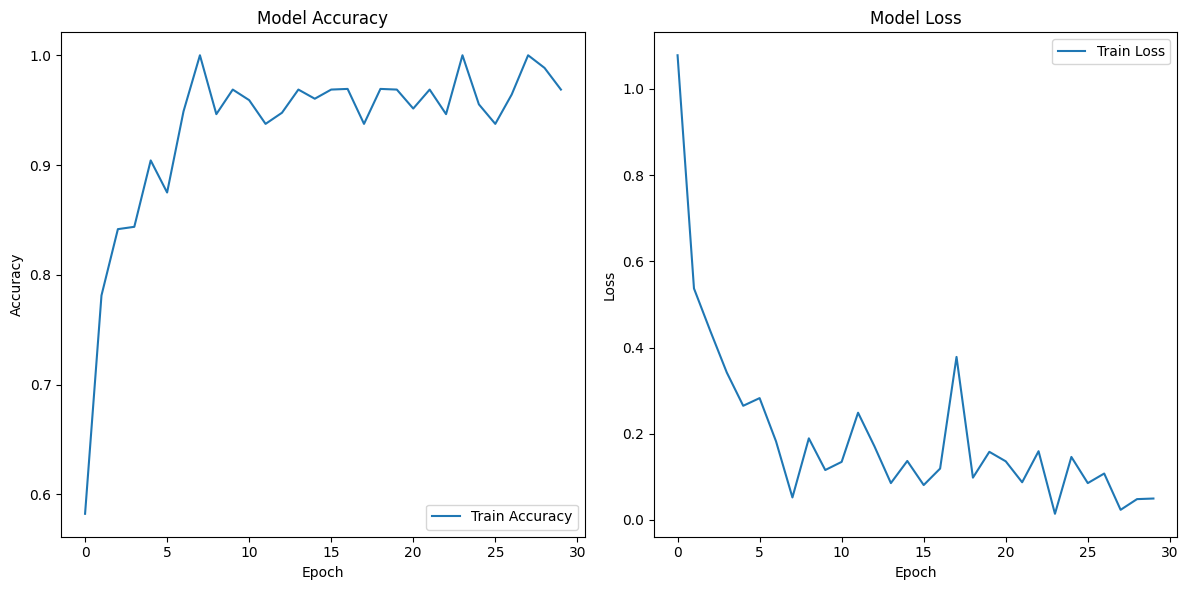

In [ ]:
# Plot hasil evaluasi
plt.figure(figsize=(12, 6))

# Plot akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Menyaring klasifikasi hanya untuk gambar ulos
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

print("\nLaporan Klasifikasi:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

13/13 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step

Laporan Klasifikasi:
              precision    recall  f1-score   support

   Pinuncaan       0.99      1.00      0.99        67
  Ragi Hidup       1.00      1.00      1.00        69
 Ragi Hotang       0.97      1.00      0.99        71
       Sadum       1.00      0.97      0.99        68
    Sibolang       1.00      1.00      1.00        71
    Tumtuman       1.00      0.99      0.99        70

    accuracy                           0.99       416
   macro avg       0.99      0.99      0.99       416
weighted avg       0.99      0.99      0.99       416



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Menghitung accuracy
accuracy = accuracy_score(true_classes, predicted_classes)
print(f"Accuracy: {accuracy:.4f}")

# Precision, Recall, dan F1-Score untuk multi-class classification
precision = precision_score(true_classes, predicted_classes, average='macro')  # Average 'macro' untuk multi-class
recall = recall_score(true_classes, predicted_classes, average='macro')
f1 = f1_score(true_classes, predicted_classes, average='macro')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.9928
Precision: 0.9930
Recall: 0.9927
F1-Score: 0.9928


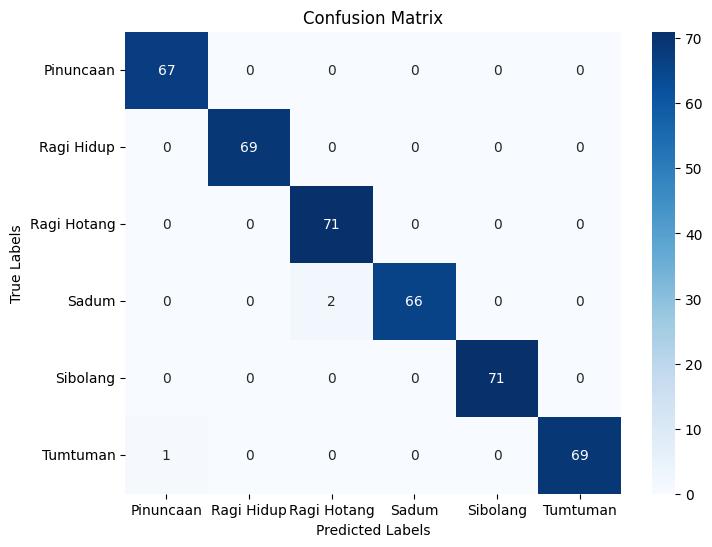

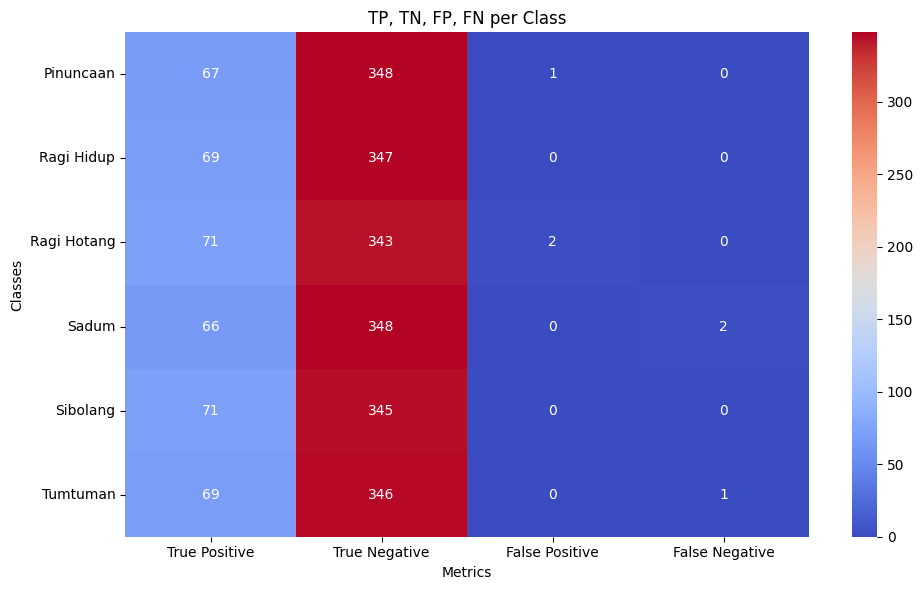

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Menghitung confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Menghitung TP, TN, FP, FN untuk setiap kelas
tp = np.diag(cm)  # Diagonal adalah True Positives
fp = cm.sum(axis=0) - tp  # Kolom sum dikurangi TP untuk FP
fn = cm.sum(axis=1) - tp  # Baris sum dikurangi TP untuk FN
tn = cm.sum() - (fp + fn + tp)  # Total sum dikurangi TP, FP, FN untuk TN

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Visualisasi TP, TN, FP, FN untuk setiap kelas
labels = test_generator.class_indices.keys()  # Nama-nama kelas
bar_width = 0.2
index = np.arange(len(labels))



# Menghitung confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Menghitung TP, TN, FP, FN untuk setiap kelas
tp = np.diag(cm)  # Diagonal adalah True Positives
fp = cm.sum(axis=0) - tp  # Kolom sum dikurangi TP untuk FP
fn = cm.sum(axis=1) - tp  # Baris sum dikurangi TP untuk FN
tn = cm.sum() - (fp + fn + tp)  # Total sum dikurangi TP, FP, FN untuk TN

# Membuat matriks TP, TN, FP, FN
metrics_matrix = np.array([tp, tn, fp, fn]).T  # Transpose agar tiap baris mewakili kelas
metrics_labels = ["True Positive", "True Negative", "False Positive", "False Negative"]

# Membuat heatmap untuk TP, TN, FP, FN per kelas
plt.figure(figsize=(10, 6))
sns.heatmap(metrics_matrix, annot=True, fmt='d', cmap="coolwarm", xticklabels=metrics_labels, yticklabels=test_generator.class_indices.keys())

# Menambahkan judul dan label
plt.title("TP, TN, FP, FN per Class")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.tight_layout()
plt.show()

# **`Simpan Model`**

In [ ]:
# Menyimpan model
model.save('model_ulos.h5')
print("Model telah disimpan sebagai 'model_ulos.h5'.")

Model telah disimpan sebagai 'model_ulos.h5'.


In [ ]:
from google.colab import files
files.download('model_ulos.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **`Evaluasi Model CNN`**

### **`Evaluasi Performa Model`**

Berikut adalah hasil evaluasi performa model CNN yang telah dilakukan:
- Accuracy
  Model menghasilkan akurasi sebesar 93.27%, yang berarti ini menunjukkan akurasi yang sangat tinggi dan sebagian besar prediksi model adalah benar.
- Precision
  Nilai precision yang dihasilkan adalah 93.92%, yang menunjukkan bahwa hampir semua prediksi positif yang dihasilkan oleh model adalah benar (low false positives).
- Recall:
  Model menghasilkan nilai recall sebesar 93.31%, yang menunjukkan bahwa model dapat melakukan deteksi pada sebagian besar data positif dengan sangat baik. Ini juga menunjukkan bahwa model yang digunakan tidak melewatkan banyak contoh positif (low false negatives).
- F1-Score:
  Dengan nilai F1-Score sebesar 93.30%, menunjukkan bahwa model yang digunakan memiliki keseimbangan yang baik antara precision dan recall.

Jadi dapat disimpulkan, bahwa model CNN yang digunakan sudah sangat baik.

### **`Evaluasi Proses`**

Meskipun model CNN yang digunakan sudah sangat baik, masih terdapat beberapa hal pada proses yang bisa diperbaiki, seperti:
- Penanganan overfitting yang dapat dilihat dari perbedaan besar antara akurasi pelatihan dan akurasi pengujian. Model terlalu menyesuaikan dengan data latih dibandingkan dengan data uji.
- Model hanya dievaluasi pada data uji, dan tidak diuji pada set data yang lain, sehingga memungkinkan model tidak tergeneralisasi dengan baik.